<a href="https://colab.research.google.com/github/fridaruh/exp_usuario_pln/blob/master/twitter_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [ ]:
import tweepy
import pandas as pd

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

In [ ]:
twitter_users = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search , q='regreso a clases', count=1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'es':
      twitter_users.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

      print([tweet.user.name,tweet.created_at, tweet.text])

['B. Leos', datetime.datetime(2021, 5, 21, 1, 32, 44), 'El dichoso regreso a clases , me parece politiquería, de esa que según ya no hay, no creo que sea coincidencia que… https://t.co/W259W7QiuI']
['Foro_TV', datetime.datetime(2021, 5, 21, 1, 32, 42), 'Las papelerías del Centro Histórico, se preparan para el regreso voluntario a clases. Sin embargo, los comerciantes… https://t.co/03tomE1QiZ']
['MAM_RyTv', datetime.datetime(2021, 5, 21, 1, 32, 22), 'Telefórmula - Grupo Fórmula/ José Cárdenas Informa/ @Luis__Humberto, titular de la @AEF_CM, aseguró que ya hay cond… https://t.co/vkEHLiCSpL']
['Nacho J', datetime.datetime(2021, 5, 21, 1, 32, 17), '48 horas en este País se Convirtieron en Largo Plazo.\n\nhttps://t.co/umn9EPn3gW']
['Monicucha', datetime.datetime(2021, 5, 21, 1, 32, 16), 'Oye Isaaaaaa @isabellemexico on andas? Para hablar del supuesto regreso a clases yen qué condiciones están las escu… https://t.co/WuHGB5H06s']
['liliane Basurto', datetime.datetime(2021, 5, 21, 1, 32, 7), '

In [ ]:
df = pd.DataFrame({'name':twitter_users, 'time':tweet_time, 'tweet':tweet_string})

In [ ]:
df.shape

(275, 3)

In [ ]:
df.head()

,name,time,tweet
0,B. Leos,2021-05-21 01:32:44,"El dichoso regreso a clases , me parece politi..."
1,Foro_TV,2021-05-21 01:32:42,"Las papelerías del Centro Histórico, se prepar..."
2,MAM_RyTv,2021-05-21 01:32:22,Telefórmula - Grupo Fórmula/ José Cárdenas Inf...
3,Nacho J,2021-05-21 01:32:17,48 horas en este País se Convirtieron en Largo...
4,Monicucha,2021-05-21 01:32:16,Oye Isaaaaaa @isabellemexico on andas? Para ha...


In [ ]:
df.tail()

,name,time,tweet
270,Meganoticias IXT,2021-05-20 23:36:29,#Zihuatanejo | Se están diagnosticando las esc...
271,Chris Castillo,2021-05-20 23:36:12,En caso de que se dé el regreso a clases el 7 ...
272,Diario Rompecabeza,2021-05-20 23:36:09,Estudiantes advierten que Yucatán no estaría l...
273,EL OCCIDENTAL,2021-05-20 23:33:54,#Importante | Conoce los detalles del #Regreso...
274,ema!🦩,2021-05-20 23:32:46,como que regreso a clases si yo ando trab...


In [ ]:
data = df['tweet'].tolist()

In [ ]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
texto = []

for x in range(0,len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  texto.append(token_2)

In [ ]:
flatten = [w for l in texto for w in l]

In [ ]:
import string
puntuacion = list(string.punctuation)

In [ ]:
nltk.download('stopwords')
newStopWords = list(nltk.corpus.stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_2 = [w for w in flatten if w not in newStopWords]

In [ ]:
df_3 = [w for w in df_2 if w not in puntuacion]

In [ ]:
fw = nltk.FreqDist(df_3)

In [ ]:
fw.most_common(25)

[('t', 243),
 ('https', 241),
 ('co', 241),
 ('clases', 214),
 ('regreso', 211),
 ('presenciales', 63),
 ('junio', 25),
 ('escuelas', 22),
 ('si', 20),
 ('vacunación', 18),
 ('estudiantes', 15),
 ('claudiashein', 14),
 ('cdmx', 13),
 ('...', 12),
 ('medidas', 12),
 ('robot', 11),
 ('7', 11),
 ('gobierno', 10),
 ('federación', 10),
 ('lopezobrador_', 10),
 ('sep_mx', 10),
 ('nacional', 10),
 ('covid-19', 9),
 ('covid', 9),
 ('benebot', 8)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

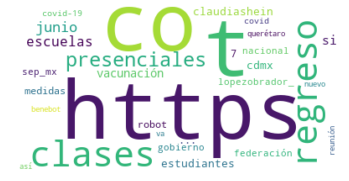

In [ ]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=30).fit_words(fw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()